## **Setup and libraries**

In [30]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1
time: 15 ms (started: 2024-06-25 14:40:24 +05:30)


In [31]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.22 s (started: 2024-06-25 14:40:24 +05:30)



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import re
import os
from keras.models import load_model
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.feature_extraction.text import TfidfVectorizer

time: 0 ns (started: 2024-06-25 14:40:27 +05:30)


# **Preprocess data**

In [33]:
# load the dataset
dataset_path= 'spam.csv'

df= pd.read_csv(dataset_path, encoding='latin1')

df .head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


time: 31 ms (started: 2024-06-25 14:40:27 +05:30)


In [34]:
# cheak if there any null value or not
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

time: 15 ms (started: 2024-06-25 14:40:27 +05:30)


In [35]:
# cheak the datatype
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

time: 0 ns (started: 2024-06-25 14:40:28 +05:30)


In [36]:
# cheak if there any duplicate value or not
df.duplicated().sum()

403

time: 15 ms (started: 2024-06-25 14:40:28 +05:30)


In [37]:
# drop unnecessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 4','Unnamed: 3'], inplace= True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


time: 16 ms (started: 2024-06-25 14:40:28 +05:30)


In [38]:
#drop the duplicate value
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

time: 16 ms (started: 2024-06-25 14:40:28 +05:30)


In [39]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

time: 16 ms (started: 2024-06-25 14:40:28 +05:30)


v1
ham     4516
spam     653
Name: count, dtype: int64

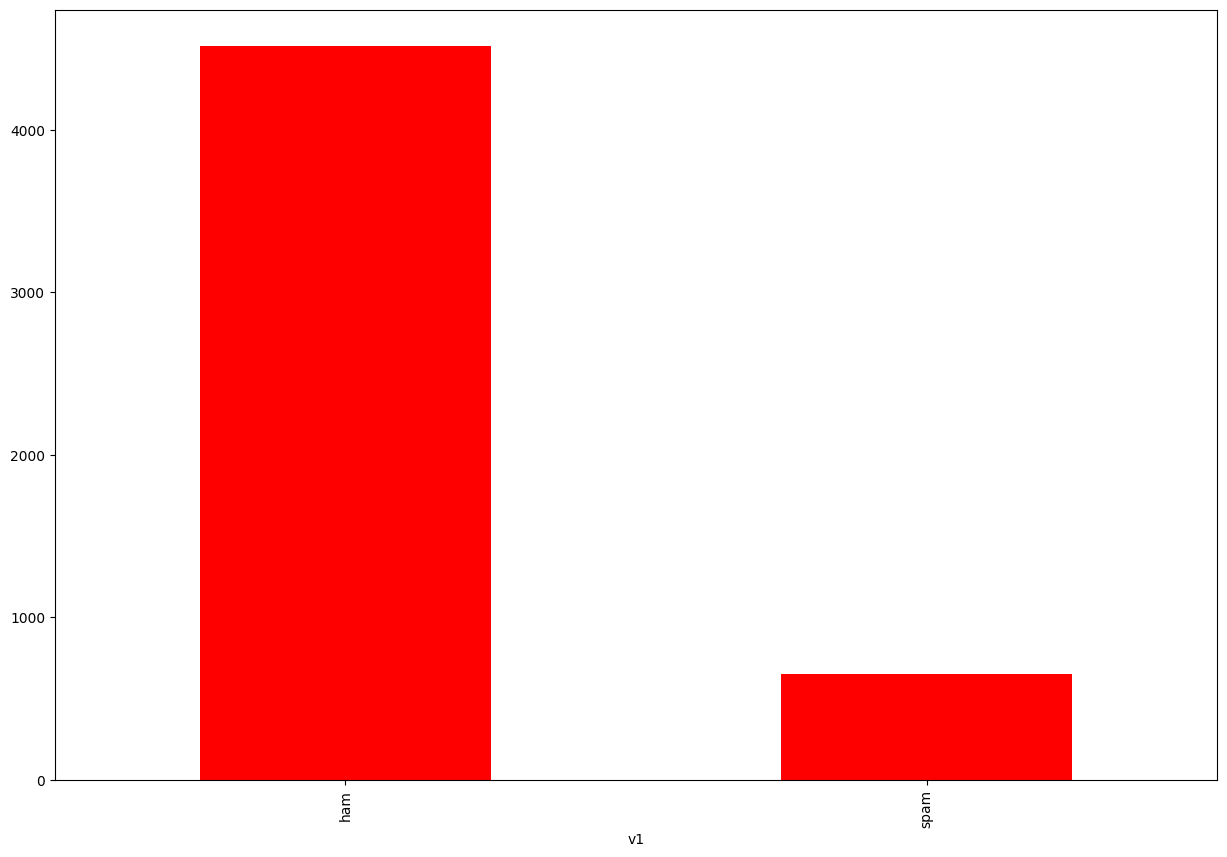

time: 297 ms (started: 2024-06-25 14:40:28 +05:30)


In [40]:
# plot
count = df['v1']
count.value_counts().plot(kind="bar",figsize=(15,10),color='red')
count.value_counts()

In [41]:
df.dtypes

v1    object
v2    object
dtype: object

time: 0 ns (started: 2024-06-25 14:40:28 +05:30)


In [42]:
# convert dtype in float
label_encoder = LabelEncoder()
df['v1'] = label_encoder.fit_transform(df['v1'])


time: 0 ns (started: 2024-06-25 14:40:28 +05:30)


C:\Users\USER\AppData\Local\Temp\ipykernel_7628\3901583770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v1'] = label_encoder.fit_transform(df['v1'])


In [43]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


time: 16 ms (started: 2024-06-25 14:40:28 +05:30)


In [44]:
X = df['v2']
Y = df['v1']

time: 0 ns (started: 2024-06-25 14:40:28 +05:30)


In [45]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object

time: 0 ns (started: 2024-06-25 14:40:28 +05:30)


In [46]:
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5169, dtype: int32

time: 16 ms (started: 2024-06-25 14:40:28 +05:30)


In [47]:
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

time: 16 ms (started: 2024-06-25 14:40:28 +05:30)


In [48]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((4135,), (1034,), (4135,), (1034,))

time: 15 ms (started: 2024-06-25 14:40:28 +05:30)


In [49]:
# For Naive Bayes, Logistic Regression, Support Vector
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf_train = tfidf.fit_transform(X_train)
X_tfidf_test = tfidf.transform(X_test)
X_train_other = X_tfidf_train.toarray()
X_test_other = X_tfidf_test.toarray()

time: 172 ms (started: 2024-06-25 14:40:28 +05:30)


In [50]:
X_test_other,X_train_other

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

time: 0 ns (started: 2024-06-25 14:40:28 +05:30)


In [51]:
X_train_other.shape, X_test_other.shape, Y_train.shape, Y_test.shape

((4135, 5000), (1034, 5000), (4135,), (1034,))

time: 16 ms (started: 2024-06-25 14:40:28 +05:30)


In [52]:
#For our custome model we use tokenize
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_tf = tokenizer.texts_to_sequences(X_train)
X_test_tf = tokenizer.texts_to_sequences(X_test)
max_length = 200
X_train_tf= pad_sequences(X_train_tf, maxlen=max_length, padding='post')
X_test_tf= pad_sequences(X_test_tf, maxlen=max_length, padding='post')

time: 313 ms (started: 2024-06-25 14:40:28 +05:30)


In [53]:
X_train_tf.shape, X_test_tf.shape, Y_train.shape, Y_test.shape

((4135, 200), (1034, 200), (4135,), (1034,))

time: 16 ms (started: 2024-06-25 14:40:29 +05:30)


# **Models**

**Tensorflow model (custom)**

In [54]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(200,)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

time: 46 ms (started: 2024-06-25 14:40:29 +05:30)


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

time: 31 ms (started: 2024-06-25 14:40:37 +05:30)


In [57]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
history = model.fit(X_train_tf, Y_train, epochs=150, batch_size=32, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5605 - loss: 120.6628 - val_accuracy: 0.8900 - val_loss: 12.3442
Epoch 2/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7556 - loss: 37.5201 - val_accuracy: 0.8936 - val_loss: 7.7387
Epoch 3/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7700 - loss: 22.6859 - val_accuracy: 0.8900 - val_loss: 4.4794
Epoch 4/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7925 - loss: 14.1819 - val_accuracy: 0.8839 - val_loss: 2.7875
Epoch 5/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7922 - loss: 11.5778 - val_accuracy: 0.8912 - val_loss: 1.8790
Epoch 6/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7842 - loss: 7.9078 - val_accuracy: 0.8875 - val_loss: 1.3692
Epoch 7/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7968 - loss: 5.5692 - val_accuracy: 0.8875 - val_loss: 0.8777
Epoch 8/150
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7998 - loss: 4.1086 - v

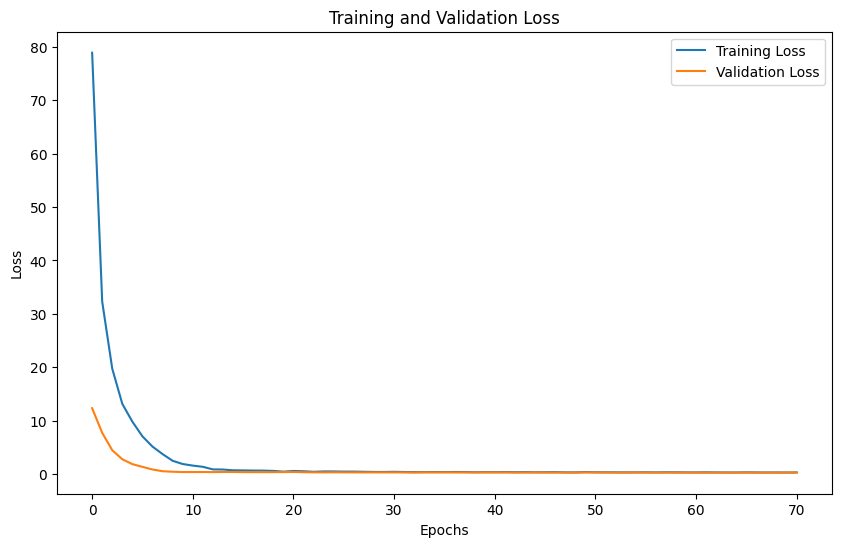

time: 187 ms (started: 2024-06-25 14:41:08 +05:30)


In [58]:
# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Logistic Regression**

In [59]:
log_reg = LogisticRegression()
log_reg.fit(X_train_other,Y_train)

LogisticRegression()

time: 906 ms (started: 2024-06-25 14:41:43 +05:30)


**Naive Bayes**

In [60]:
nb= MultinomialNB()
nb.fit(X_train_other, Y_train)

MultinomialNB()

time: 172 ms (started: 2024-06-25 14:42:16 +05:30)


**Support Vector Machine**

In [61]:
svm = SVC()
svm.fit(X_train_other,Y_train)

SVC()

time: 50.8 s (started: 2024-06-25 14:42:45 +05:30)


# **Models evaluation and predection**

**Tensorflow model**

In [62]:
# Evaluate
loss, accuracy = model.evaluate(X_test_tf, Y_test)
print(f'\n Accuracy: {accuracy}')

# Predict
y_pred_tf = (model.predict(X_test_tf) > 0.5).astype("int32")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8718 - loss: 0.3368 

 Accuracy: 0.8733075261116028
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
time: 421 ms (started: 2024-06-25 14:43:48 +05:30)


**Logistic Regression**

In [63]:
# Predict
y_pred_log_reg = log_reg.predict(X_test_other)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_log_reg)}")
print(classification_report(Y_test, y_pred_log_reg))

Accuracy: 0.9661508704061895
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.98      0.77      0.86       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.92      1034
weighted avg       0.97      0.97      0.96      1034

time: 47 ms (started: 2024-06-25 14:44:17 +05:30)


**Naive Bayes**

In [64]:
# Predict
y_pred_nb = nb.predict(X_test_other)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_nb)}")
print(classification_report(Y_test, y_pred_nb))

Accuracy: 0.971953578336557
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       1.00      0.80      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034

time: 47 ms (started: 2024-06-25 14:44:42 +05:30)


**Support Vector Machine**

In [65]:
# Predict
y_svm_predict = svm.predict(X_test_other)
print(f"Accuracy: {accuracy_score(Y_test, y_svm_predict)}")
print(classification_report(Y_test, y_svm_predict))

Accuracy: 0.9806576402321083
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.99      0.87      0.93       145

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034

time: 14.1 s (started: 2024-06-25 14:45:11 +05:30)


# **Visualization(confusion matrix)**

In [68]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Spam detection confusion Matrix')
    plt.show()


time: 0 ns (started: 2024-06-25 14:46:42 +05:30)


**Tensorflow model**

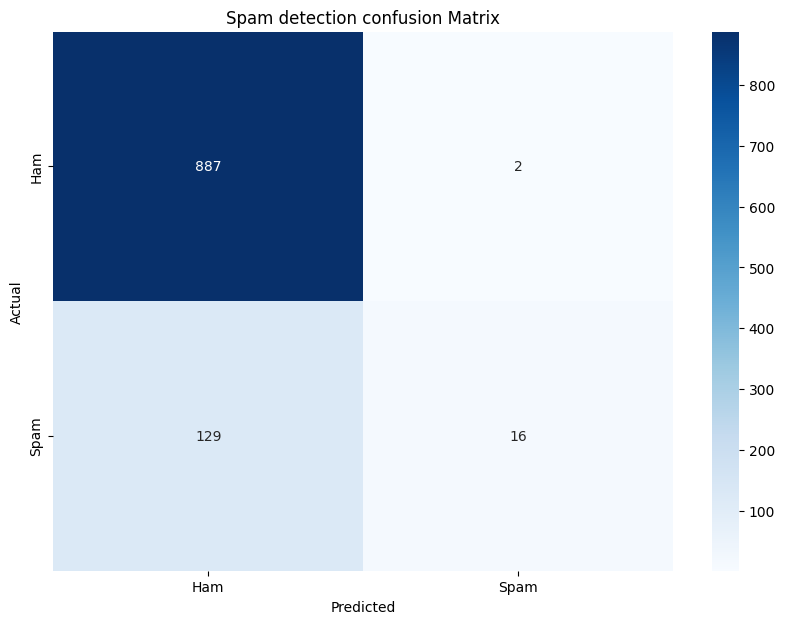

time: 219 ms (started: 2024-06-25 14:46:45 +05:30)


In [69]:
plot_confusion_matrix(Y_test, y_pred_tf)

**Logistic Regression**

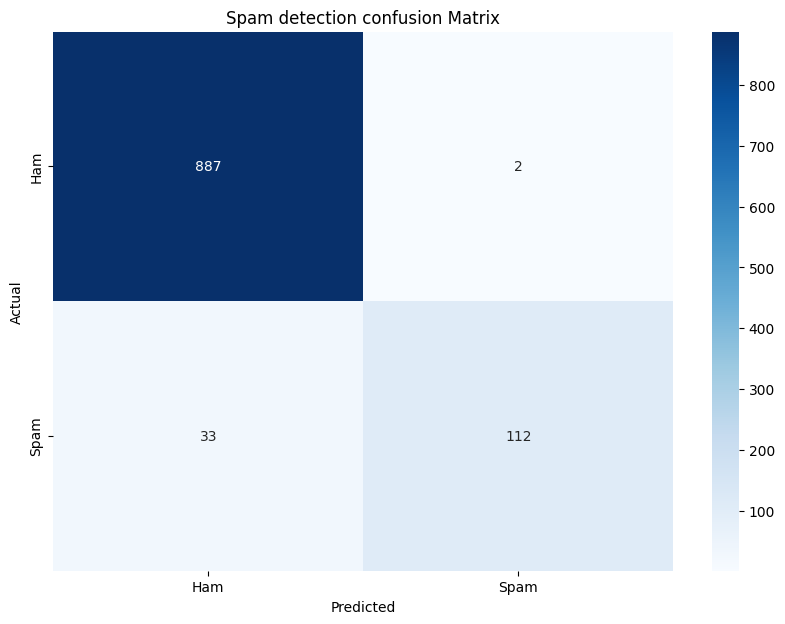

time: 218 ms (started: 2024-06-25 14:47:19 +05:30)


In [70]:
plot_confusion_matrix(Y_test, y_pred_log_reg)

**Naive Bayes**

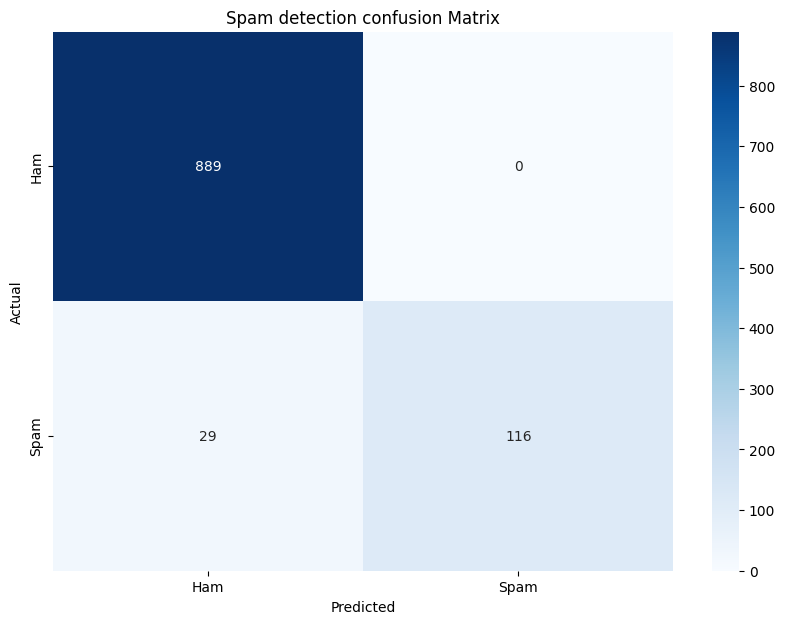

time: 219 ms (started: 2024-06-25 14:47:51 +05:30)


In [71]:
plot_confusion_matrix(Y_test, y_pred_nb)

**Support Vector Machine**

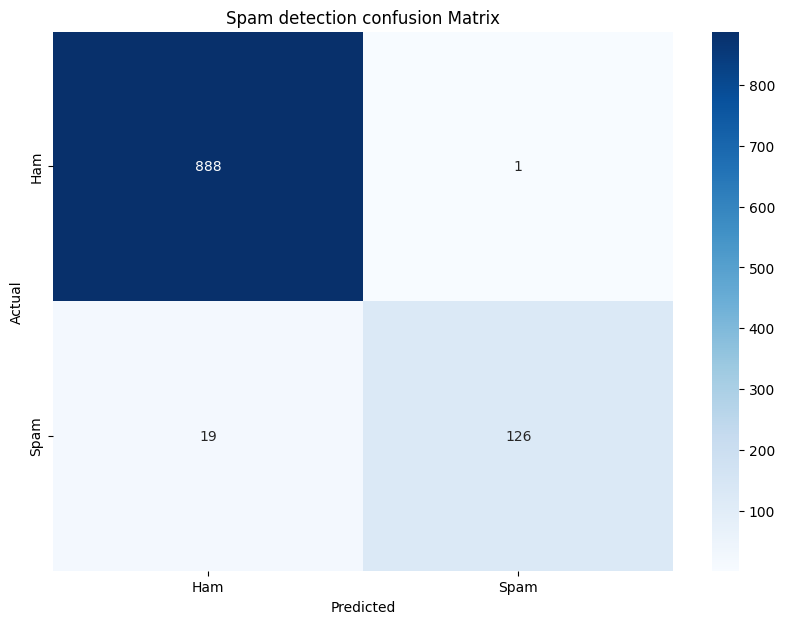

time: 204 ms (started: 2024-06-25 14:48:31 +05:30)


In [72]:
plot_confusion_matrix(Y_test, y_svm_predict)